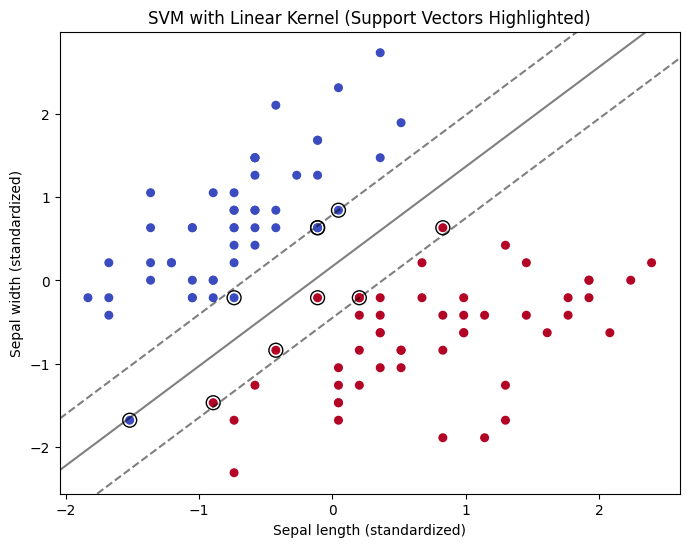

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset and select only two features for easy visualization
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only sepal length and width for 2D visualization
y = iris.target

# Select only two classes for binary classification
X = X[y != 2]
y = y[y != 2]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM with linear kernel
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_scaled, y)

# Plot decision boundary and support vectors
def plot_svm_decision_boundary(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)
    
    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    
    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
               s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.figure(figsize=(8, 6))
plot_svm_decision_boundary(svm, X_scaled, y)
plt.title('SVM with Linear Kernel (Support Vectors Highlighted)')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.show()
